# Car Price Prediction 🚕🚕

In this notebook we are going through a amchine learning project with the predicting the price of the car .

## Workflow

### 1.Problem Definition :

How well we can predict the future price of the new car , given its feature and previous examples of how much similiar old cars were sold.

### 2. Data:

The data is downloaed from Kaggle:
[car](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction)

### 3. Data Visualization & Preprocessing

### 4. Modelling

### 5. Evaluation

### 6. Features Importance

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("C:\\Users\\SAMPATH\\Downloads\\archive(19)\\ford.csv")

In [3]:
#CHECKING FIRST FIVE ROWS
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
len(df.model.value_counts())

24

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
df.shape
#THERE ARE 17966 ROWS AND 9 COLUMNS

(17966, 9)

### checking for null values

In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Data analysis


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
df[df["year"]>2022]
#Here we found an outlier we need to remoe the row from the data frame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [10]:
df=df[df["year"]!=2060]

In [11]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.645465,-0.718668,0.300518,-0.021488,-0.139170
price,0.645465,1.000000,-0.530610,0.406999,-0.346557,0.411203
mileage,-0.718668,-0.530610,1.000000,-0.260619,0.120225,0.215040
tax,0.300518,0.406999,-0.260619,1.000000,-0.502919,0.184365
mpg,-0.021488,-0.346557,0.120225,-0.502919,1.000000,-0.260528
engineSize,-0.139170,0.411203,0.215040,0.184365,-0.260528,1.000000


###  Let us drop some unwanted columns

### By using mpg,enginesize,mileage,tax we are going to predict the price of the car

In [12]:
df=df.drop(["model"],axis=1)

In [13]:
df["engineSize"].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     111
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

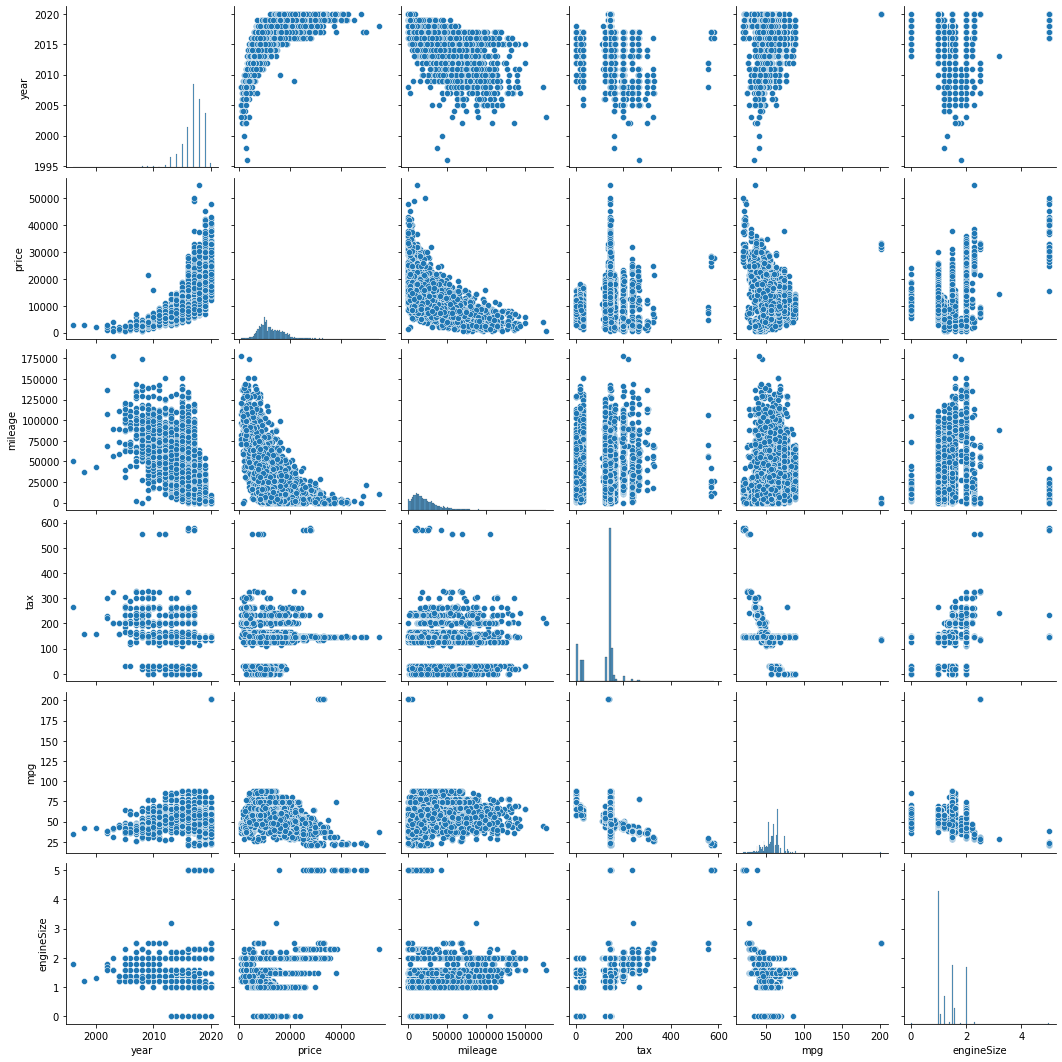

In [14]:
sns.pairplot(data=df)

#### since the data have categorical and numerical columns pair plot doesnot give much information, so lets plot seperately  

 #### By  using barplot let us plot some categorical data vs price

<function matplotlib.pyplot.show(close=None, block=None)>

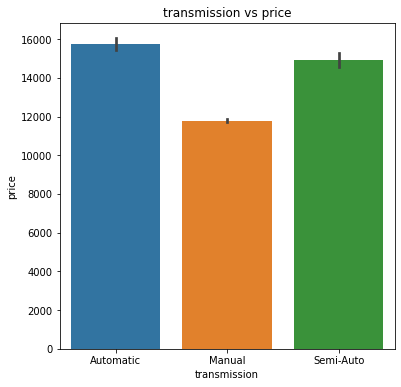

In [15]:
plt.figure(figsize=(6,6))
sns.barplot(x="transmission",y="price",data=df).set(title="transmission vs price")
plt.show

[Text(0.5, 1.0, 'Fuel Type vs Price')]

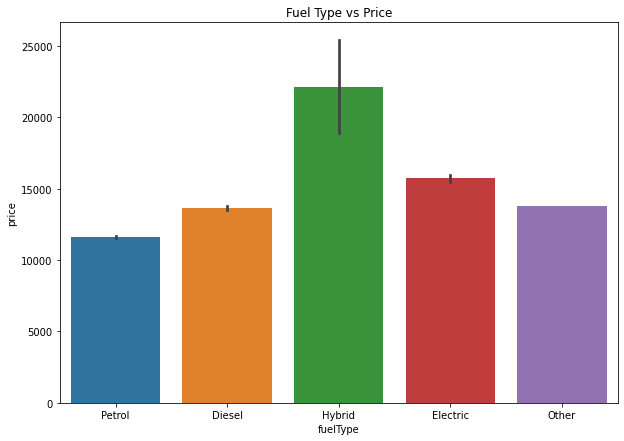

In [16]:
#NOW LET US CHECK THE RELATION BETWEEN MODEL AND PRICE BY PLOTTING
plt.figure(figsize=(10,7))
sns.barplot(x="fuelType",y="price",data=df).set(title="Fuel Type vs Price")

#### BY USING SCATTER PLOT LET US PLOT THE FOLLOWING CONTINOUS NUMERICAL DATA VS PRICE


<AxesSubplot:xlabel='mileage', ylabel='price'>

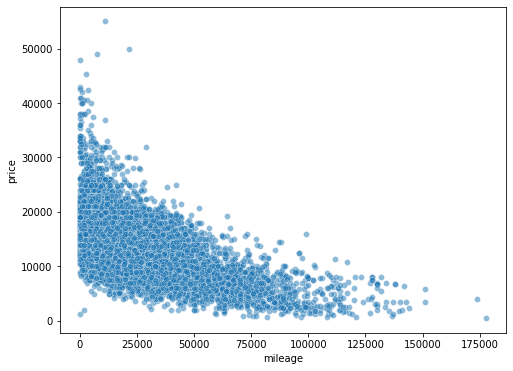

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="mileage",y="price",data=df,alpha=0.5)

<AxesSubplot:xlabel='price', ylabel='mpg'>

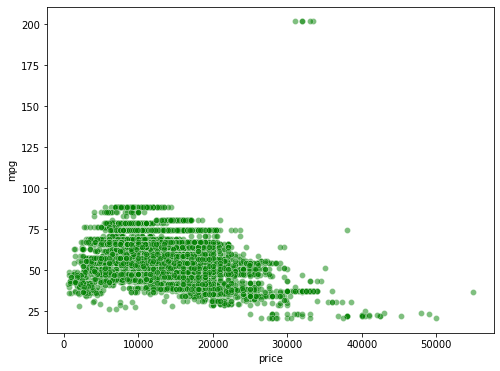

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="price",y="mpg",data=df,alpha=0.5,color="green")

<AxesSubplot:xlabel='year', ylabel='price'>

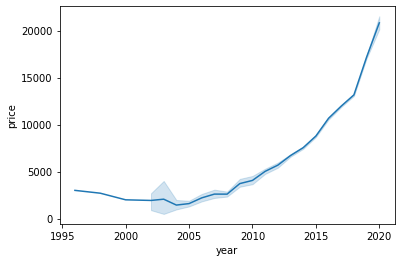

In [19]:
sns.lineplot(data=df,x="year",y="price")

In [20]:
df["price"]

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17965, dtype: int64

In [21]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


### One hot encoding to fix categorical columns

In [22]:
def one_hot_encode(df,column):

    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [23]:
df=one_hot_encode(df,"transmission")
df=one_hot_encode(df,"fuelType")
df.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,0,0,1


### Creating heat map

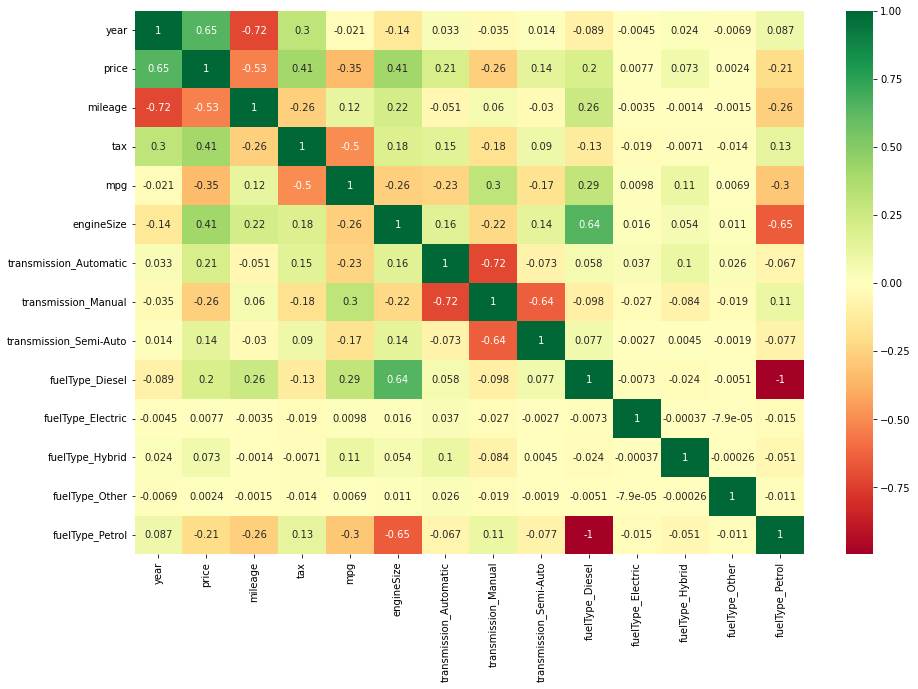

In [24]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
X=df.drop("price",axis=1)
y=df["price"]

### Feauture Importance


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[3.11072110e-01 1.73029786e-01 9.98570950e-02 1.35157540e-01
 1.88847228e-01 4.14515049e-03 2.16694583e-02 3.70578673e-03
 4.57563498e-03 2.81114807e-05 3.00000488e-04 2.13496962e-06
 5.76099635e-02]


### Plotting graph of feature importances for better visualization

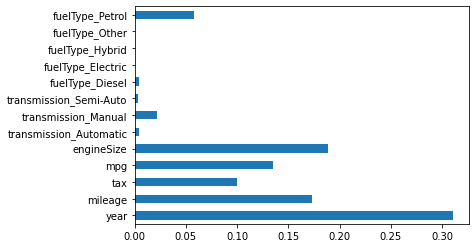

In [28]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.plot(kind="barh")
plt.show()

### Modelling and evaluation

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [31]:
from sklearn.metrics import r2_score

In [32]:
lr=LinearRegression()
la=Lasso()
ri=Ridge()
rf1=RandomForestRegressor()

In [33]:
lr.fit(X_train,y_train)
la.fit(X_train,y_train)
ri.fit(X_train,y_train)
rf1.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
lr_pred=lr.predict(X_test)
la_pred=la.predict(X_test)
ri_pred=ri.predict(X_test)
rf1_pred=rf1.predict(X_test)

In [35]:
print("r2_score of random forest regressor is "+str(r2_score(y_test,rf1_pred)))
print("r2_score of linear regression is "+str(r2_score(y_test,lr_pred)))
print("r2_score of lasso regression is "+str(r2_score(y_test,la_pred)))
print("r2_score of forest regressor is "+str(r2_score(y_test,ri_pred)))

r2_score of random forest regressor is 0.9079943057460005
r2_score of linear regression is 0.7363876554445756
r2_score of lasso regression is 0.7355665760358989
r2_score of forest regressor is 0.7361551948942959


### The more the the r2_score close to one is the more the model is good .Here from these four models  we select random forest regressor

### Now let us do hyper paramter tuning for random forest regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

### Randomized search CV

In [37]:
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of features to consider at each split
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [38]:
#creating random grid
random_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
rf=RandomForestRegressor()

In [41]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=101)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=  11.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  40.2s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  39.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  36.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  37.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  36.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   5.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=  10.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=  10.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=  10.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   9.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=400; total time=   9.8s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=  23.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=  23.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=  23.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=  23.7s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=  25.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  16.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  16.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  16.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  16.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=  16.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.2s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.7s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.7s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  13.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  13.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  13.2s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  13.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  13.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   2.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   1.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   2.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   2.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   2.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
pred=rf_random.predict(X_test)

In [50]:
pred

array([15956.8086088 ,  8695.93212699,  9753.85921864, ...,
        7937.11734255,  8311.01700019, 19071.4556797 ])

In [51]:
r2_score(y_test,pred)

0.9192987190351061

#### Saving the model


In [52]:
import pickle

In [53]:
file_name="Ford car price prediction"

In [54]:
pickle.dump(rf_random,open(file_name,"wb"))